In [39]:
from pathlib import Path


from sklearn.preprocessing import MinMaxScaler
import librosa
from IPython import display
from  matplotlib import pyplot
#%matplotlib notebook
%matplotlib inline

In [40]:
def show_waveform(data_, title= "waveform"):
  pyplot.figure()
  pyplot.title(title)
  pyplot.plot(data_)
  pyplot.show()

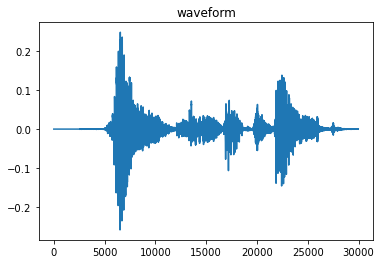

In [41]:
audio_file = Path.home()/'Data'/'Audio'/'Speech'/'this_is_a_test'/"this_is_a_test.wav"

raw, rate = librosa.load(str(audio_file))
show_waveform(raw)
display.Audio(raw,rate=rate)

before transform  [-687.2257  -687.2257  -687.2257  -687.2257  -677.12103 -641.00073
 -625.7862  -622.71436 -620.19415 -573.30237]
mfcc shape  (20, 59)


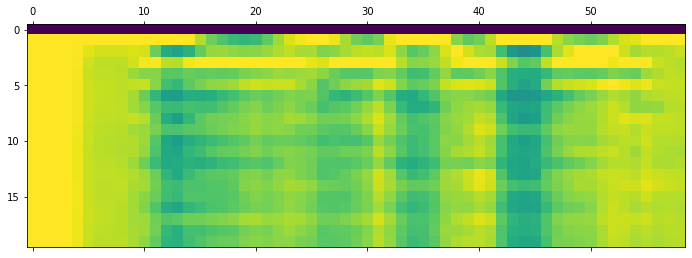

In [42]:
cepstral = librosa.feature.mfcc(raw)
print('before transform ', cepstral[0][:10])
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(cepstral)

cepstral = scaler.transform(cepstral)
print('mfcc shape ', cepstral.shape)
pyplot.matshow(cepstral)
pyplot.show()

after inverse transform  [-687.2257  -687.2257  -687.2257  -687.2257  -677.12103 -641.00073
 -625.7862  -622.71436 -620.19415 -573.30237]


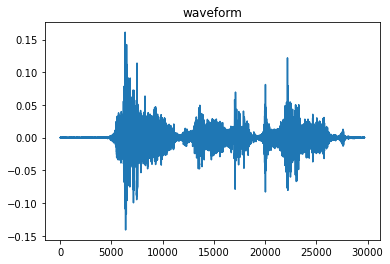

In [43]:
recover = scaler.inverse_transform(cepstral)
print('after inverse transform ', recover[0][:10])
recover = librosa.feature.inverse.mfcc_to_audio(recover)
show_waveform(recover)
display.Audio(recover,rate=rate)

# Notes
MFCCs discard information by a low-rank linear projection of the mel spectrum.
An MFCC representation with n_mel=128 and n_mfcc=40 is analogous to a jpeg image with quality set to 30%.
You also lose phase information (though there are ways to estimate it, eg griffin-lim)

